# Task 2

## Imports

In [1]:
import sys

sys.path.append("../")

import pandas as pd
import matplotlib.pyplot as plt
from task1.retrieval_system import RetrievalSystem
from task1.similarity_measure import (
    cosine_similarity,
    dot_product,
    manhattan_distance,
    euclidean_distance,
    random_similarity,
)
from utils import read, embed_and_merge

## Load data

In [2]:
# basic song information from task 1
df = read("information", 0)
# add genre information for metric calculation
genres = read("genres", 0)
# convert genre to actual list via eval
genres["genre"] = genres["genre"].apply(eval).apply(set)
df = df.merge(genres, on="id", how="left")

In [3]:
for feature in ["mfcc_bow", "blf_spectral", "ivec256", "ivec1024", "musicnn"]:
    stats = read(feature, 0)
    df = embed_and_merge(df, stats, feature)

In [4]:
for text_feature in ["lyrics_bert", "lyrics_word2vec", "lyrics_tf-idf"]:
    stats = read(text_feature, 0)
    df = embed_and_merge(df, stats, text_feature.split("_")[1])

In [5]:
# data for task 2 does not include the item with id "03Oc9WeMEmyLLQbj" = row 5
df = df.drop(5)
df = df.reset_index()

## Instantiate retrieval systems

In [6]:
# create pd dataframe consisting of all retrieval systems, with metric and feature
rs = pd.DataFrame(
    [
        [
            "random",
            "random",
            RetrievalSystem(
                df=df,
                sim_metric=random_similarity,
            ),
        ],
        [
            "cosine",
            "tf-idf",
            RetrievalSystem(
                df=df,
                sim_metric=cosine_similarity,
                sim_feature="tf-idf",
            ),
        ],
        [
            "cosine",
            "bert",
            RetrievalSystem(
                df=df,
                sim_metric=cosine_similarity,
                sim_feature="bert",
            ),
        ],
        [
            "dot",
            "word2vec",
            RetrievalSystem(
                df=df,
                sim_metric=dot_product,
                sim_feature="word2vec",
            ),
        ],
        [
            "cosine",
            "mfcc_bow",
            RetrievalSystem(
                df=df,
                sim_metric=cosine_similarity,
                sim_feature="mfcc_bow",
            ),
        ],
        [
            "cosine",
            "blf_spectral",
            RetrievalSystem(
                df=df,
                sim_metric=cosine_similarity,
                sim_feature="blf_spectral",
            ),
        ],
        [
            "cosine",
            "ivec256",
            RetrievalSystem(
                df=df,
                sim_metric=cosine_similarity,
                sim_feature="ivec256",
            ),
        ],
        [
            "cosine",
            "musicnn",
            RetrievalSystem(
                df=df,
                sim_metric=cosine_similarity,
                sim_feature="musicnn",
            ),
        ],
    ],
    columns=["metric", "feature", "rs_object"],
)
rs

,metric,feature,rs_object
0,random,random,<task1.retrieval_system.RetrievalSystem object...
1,cosine,tf-idf,<task1.retrieval_system.RetrievalSystem object...
2,cosine,bert,<task1.retrieval_system.RetrievalSystem object...
3,dot,word2vec,<task1.retrieval_system.RetrievalSystem object...
4,cosine,mfcc_bow,<task1.retrieval_system.RetrievalSystem object...
5,cosine,blf_spectral,<task1.retrieval_system.RetrievalSystem object...
6,cosine,ivec256,<task1.retrieval_system.RetrievalSystem object...
7,cosine,musicnn,<task1.retrieval_system.RetrievalSystem object...


## Evaluation

In [7]:
from task2.pipeline import Pipeline

evaluate = Pipeline(rs, genres)

Creating genre overlap matrix:   0%|          | 0/10094 [00:00<?, ?it/s]

Creating result lists for every rs (max_k=100):   0%|          | 0/8 [00:00<?, ?it/s]

loaded results for system.metric='random', system.feature='random' from "results/random_random_results_100.npy"
loaded results for system.metric='cosine', system.feature='tf-idf' from "results/cosine_tf-idf_results_100.npy"
loaded results for system.metric='cosine', system.feature='bert' from "results/cosine_bert_results_100.npy"
loaded results for system.metric='dot', system.feature='word2vec' from "results/dot_word2vec_results_100.npy"
loaded results for system.metric='cosine', system.feature='mfcc_bow' from "results/cosine_mfcc_bow_results_100.npy"
loaded results for system.metric='cosine', system.feature='blf_spectral' from "results/cosine_blf_spectral_results_100.npy"
loaded results for system.metric='cosine', system.feature='ivec256' from "results/cosine_ivec256_results_100.npy"
loaded results for system.metric='cosine', system.feature='musicnn' from "results/cosine_musicnn_results_100.npy"


In [12]:
evaluate.load_results_csv("task_2.csv")
result = evaluate.run(
    [
        # (Pipeline.mean_precision_at_k, dict(k=10)),
        # (Pipeline.mean_recall_at_k, dict(k=10)),
        # (Pipeline.precision_and_recall_interval, dict(k_min=1, k_max=100, step_size=5)),
        # (Pipeline.mean_ndcg_at_k, dict(k=10)),
        # (Pipeline.genre_coverage_at_k, dict(k=10)),
        (Pipeline.mean_genre_diversity_at_k, dict(k=10)),
    ]
)
result.to_csv("task_2.csv", index=False)
result

running pipeline:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating 'mean_genre_diversity_at_k' with {'k': 10}:   0%|          | 0/8 [00:00<?, ?it/s]

,metric,feature,rs_object,mean_precision_at_k,mean_recall_at_k,precision_and_recall_interval,mean_ndcg_at_k,genre_coverage_at_k,mean_genre_diversity_at_k
0,random,random,<task1.retrieval_system.RetrievalSystem object...,0.442520,0.000976,recall precision k ...,0.131709,1.000000,5.067064
1,cosine,tf-idf,<task1.retrieval_system.RetrievalSystem object...,0.510709,0.001340,recall precision k ...,0.163754,0.982014,4.974558
2,cosine,bert,<task1.retrieval_system.RetrievalSystem object...,0.557192,0.001862,recall precision k ...,0.196265,0.956835,4.845966
3,dot,word2vec,<task1.retrieval_system.RetrievalSystem object...,0.455934,0.000933,recall precision k ...,0.124160,0.480216,4.681670
4,cosine,mfcc_bow,<task1.retrieval_system.RetrievalSystem object...,0.588518,0.001737,recall precision k ...,0.216050,0.981115,4.743527
5,cosine,blf_spectral,<task1.retrieval_system.RetrievalSystem object...,0.589935,0.001800,recall precision k ...,0.218365,0.972122,4.737670
6,cosine,ivec256,<task1.retrieval_system.RetrievalSystem object...,0.565564,0.001712,recall precision k ...,0.208839,0.999101,4.905104
7,cosine,musicnn,<task1.retrieval_system.RetrievalSystem object...,0.623598,0.001937,recall precision k ...,0.231601,0.997302,4.705990


### Precision Recall Curves

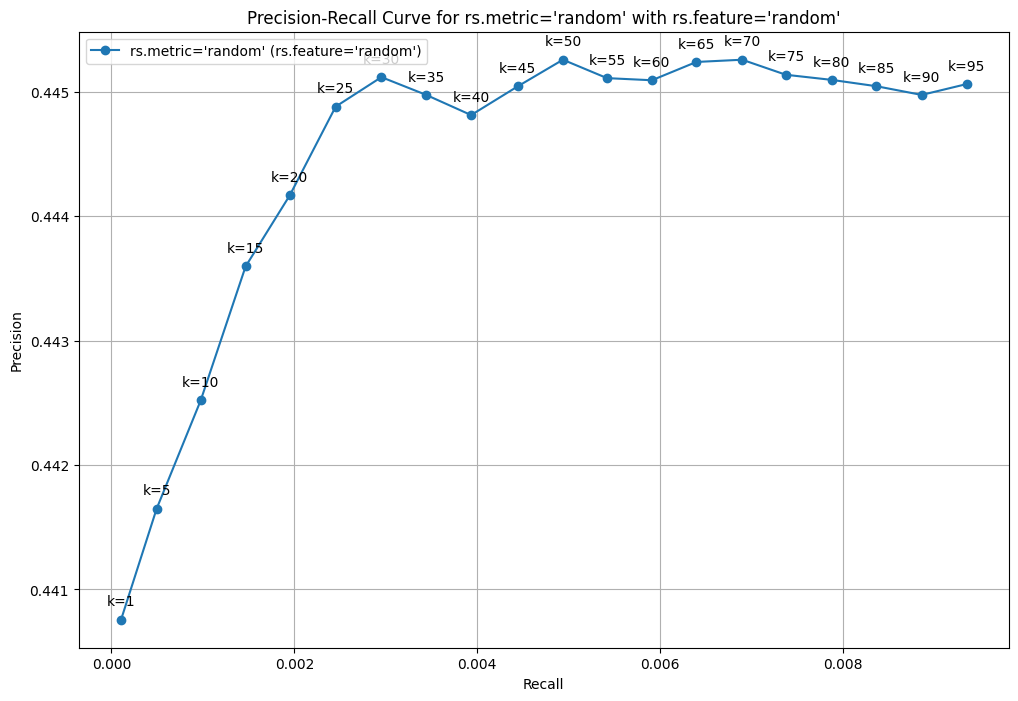

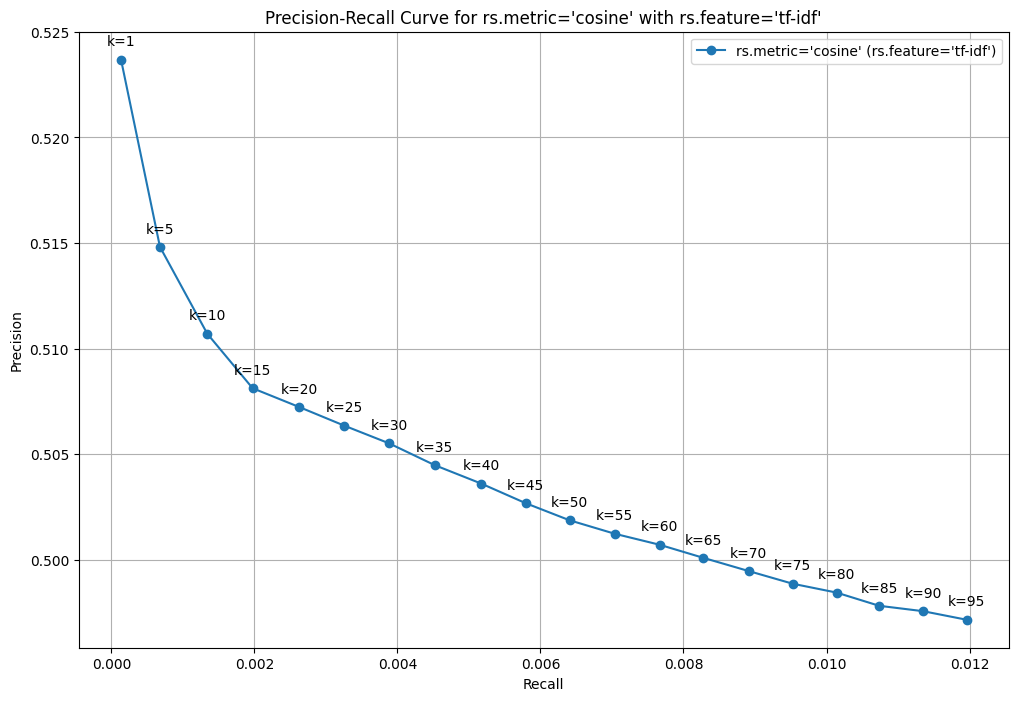

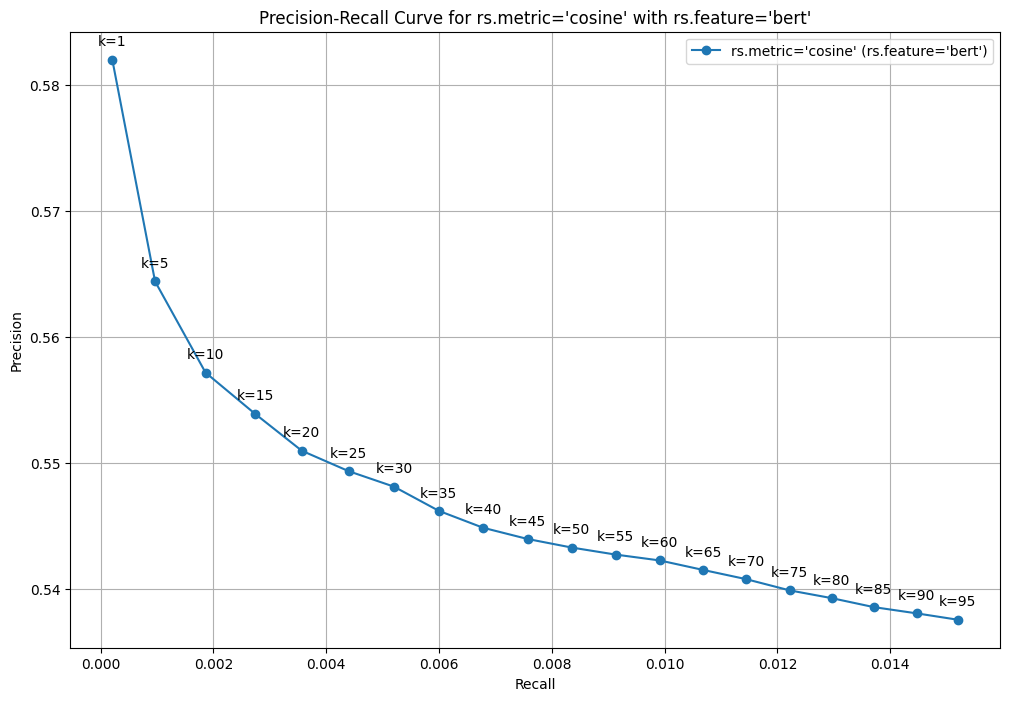

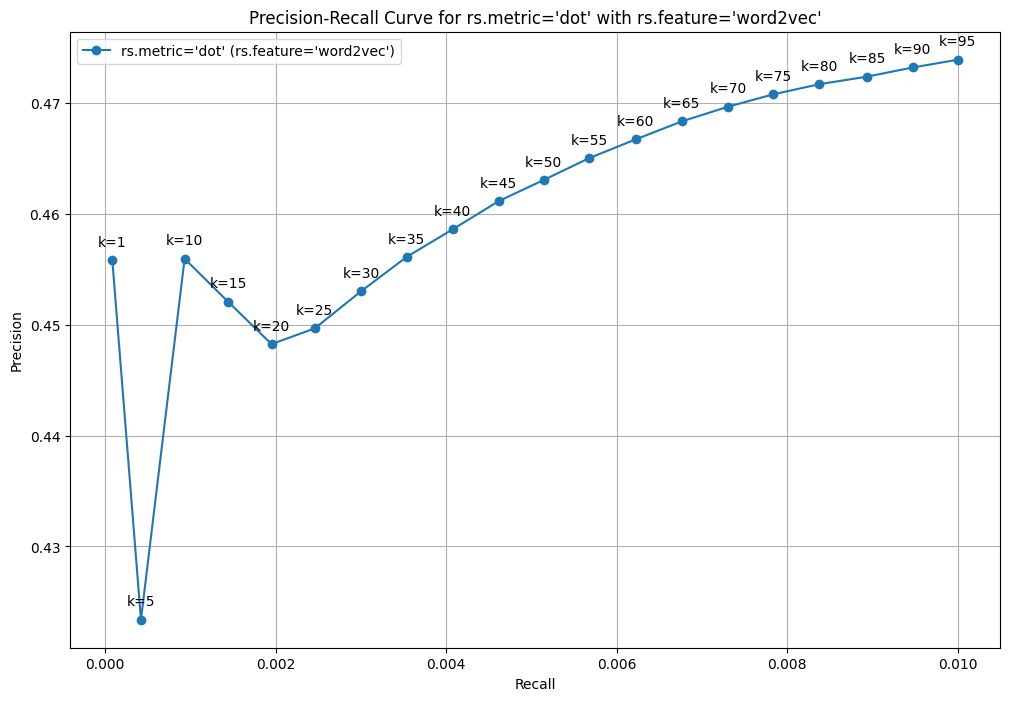

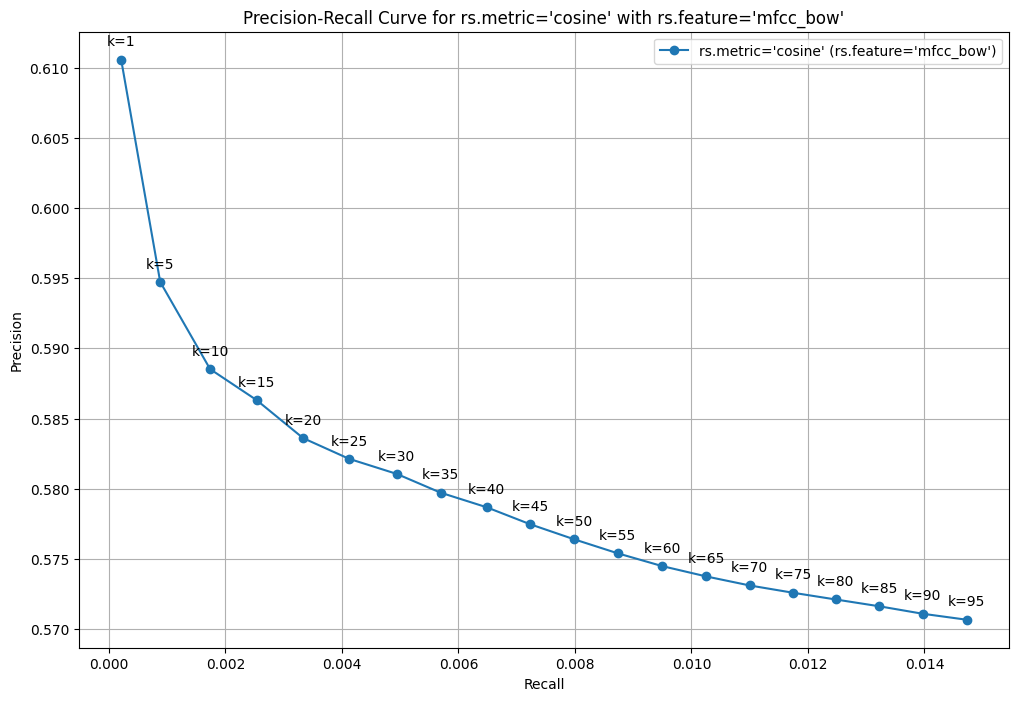

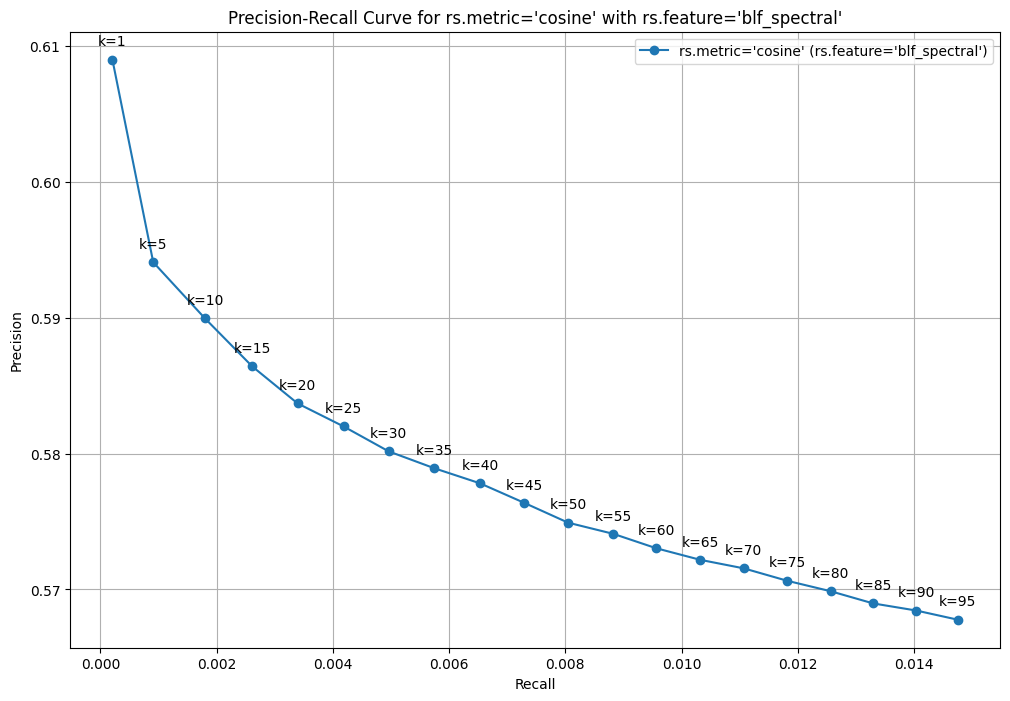

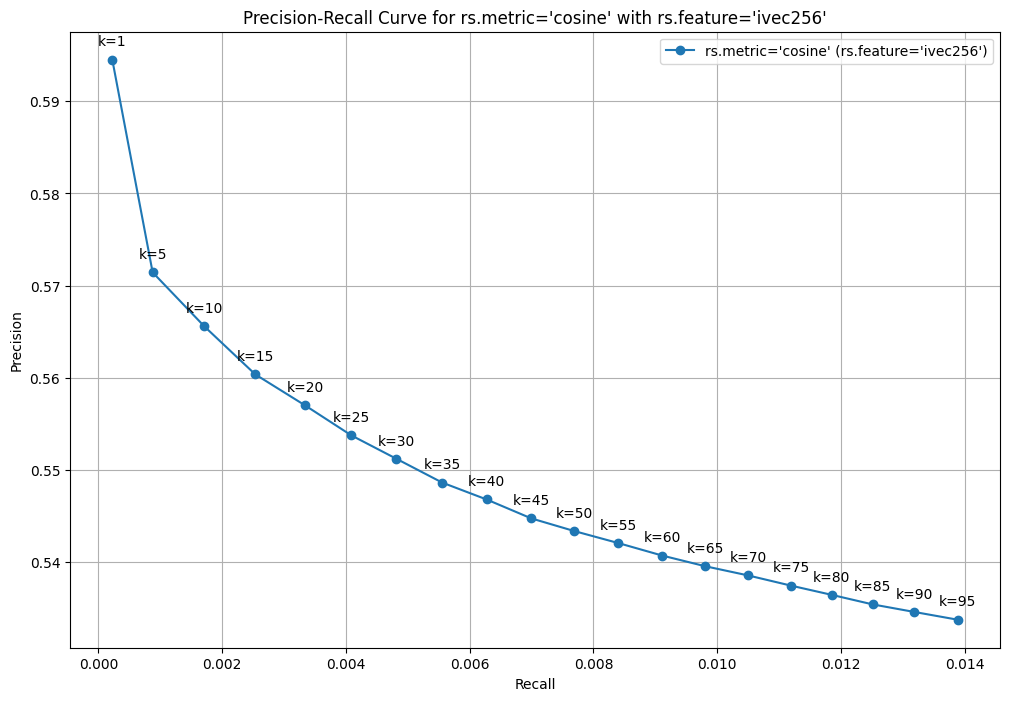

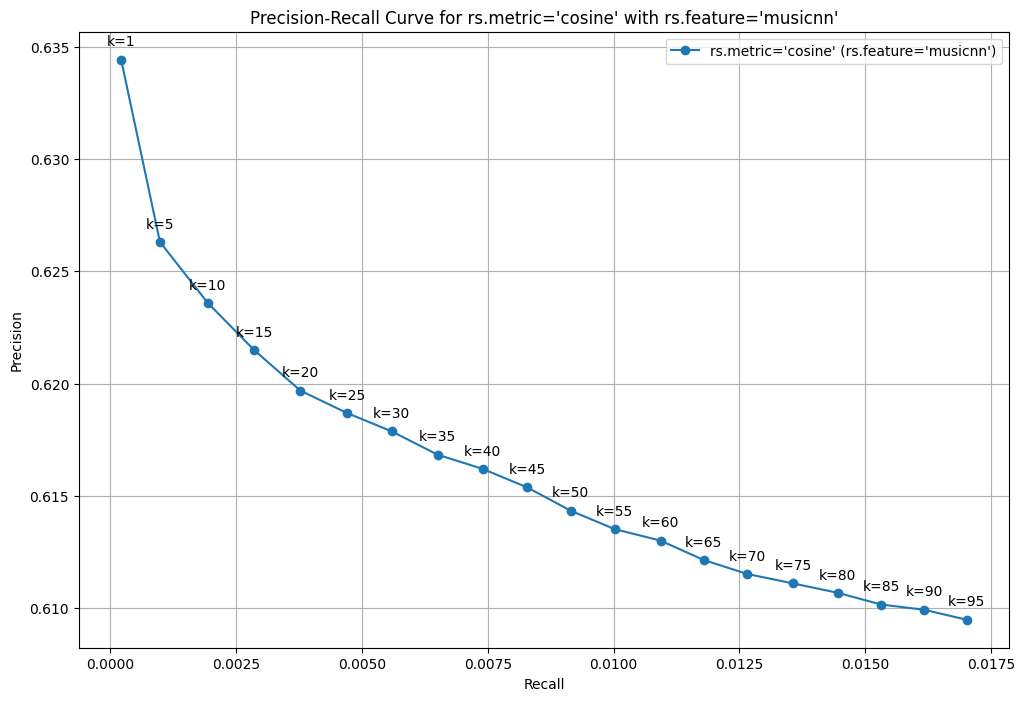

In [9]:
for rs in result.itertuples():
    metrics_df = rs.precision_and_recall_interval

    plt.figure(figsize=(12, 8))
    plt.plot(
        metrics_df["recall"],
        metrics_df["precision"],
        marker="o",
        label=f"{rs.metric=} ({rs.feature=})",
    )

    # Annotate each point with its k value
    for k, recall, precision in zip(
        metrics_df.index, metrics_df["recall"], metrics_df["precision"]
    ):
        plt.annotate(
            f"k={k}",
            (recall, precision),
            textcoords="offset points",
            xytext=(0, 10),
            ha="center",
        )

    plt.title(f"Precision-Recall Curve for {rs.metric=} with {rs.feature=}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid(True)
    plt.show()